In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans

# Configure Matplotlib and Seaborn
plt.style.use('ggplot')
sns.set_theme()

In [2]:
# Load the dataset
file_path = 'WA_Fn-UseC_-Telco-Customer-Churn.csv' 
data = pd.read_csv(file_path)

# Display the first few rows
print("Dataset Loaded Successfully!")
data.head()

Dataset Loaded Successfully!


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# Check for null values in each attribute
print("\nNull Values in Each Attribute:")
null_values = data.isnull().sum()
print(null_values)

# Summary of null values
if null_values.sum() == 0:
    print("\nNo null values found in the dataset!")
else:
    print(f"\nTotal null values: {null_values.sum()}")


Null Values in Each Attribute:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

No null values found in the dataset!


In [4]:
# Check data types of each attribute
print("Data Types of Each Attribute:")
print(data.dtypes)

Data Types of Each Attribute:
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


In [5]:
# Check for missing values
missing_values = data.isnull().sum()

# Display columns with missing values (if any)
print("Missing Values in Each Column:")
print(missing_values[missing_values > 0])

# Summary of missing values
if missing_values.sum() == 0:
    print("\nNo missing values in the dataset!")
else:
    total_missing = missing_values.sum()
    print(f"\nTotal missing values: {total_missing}")

Missing Values in Each Column:
Series([], dtype: int64)

No missing values in the dataset!


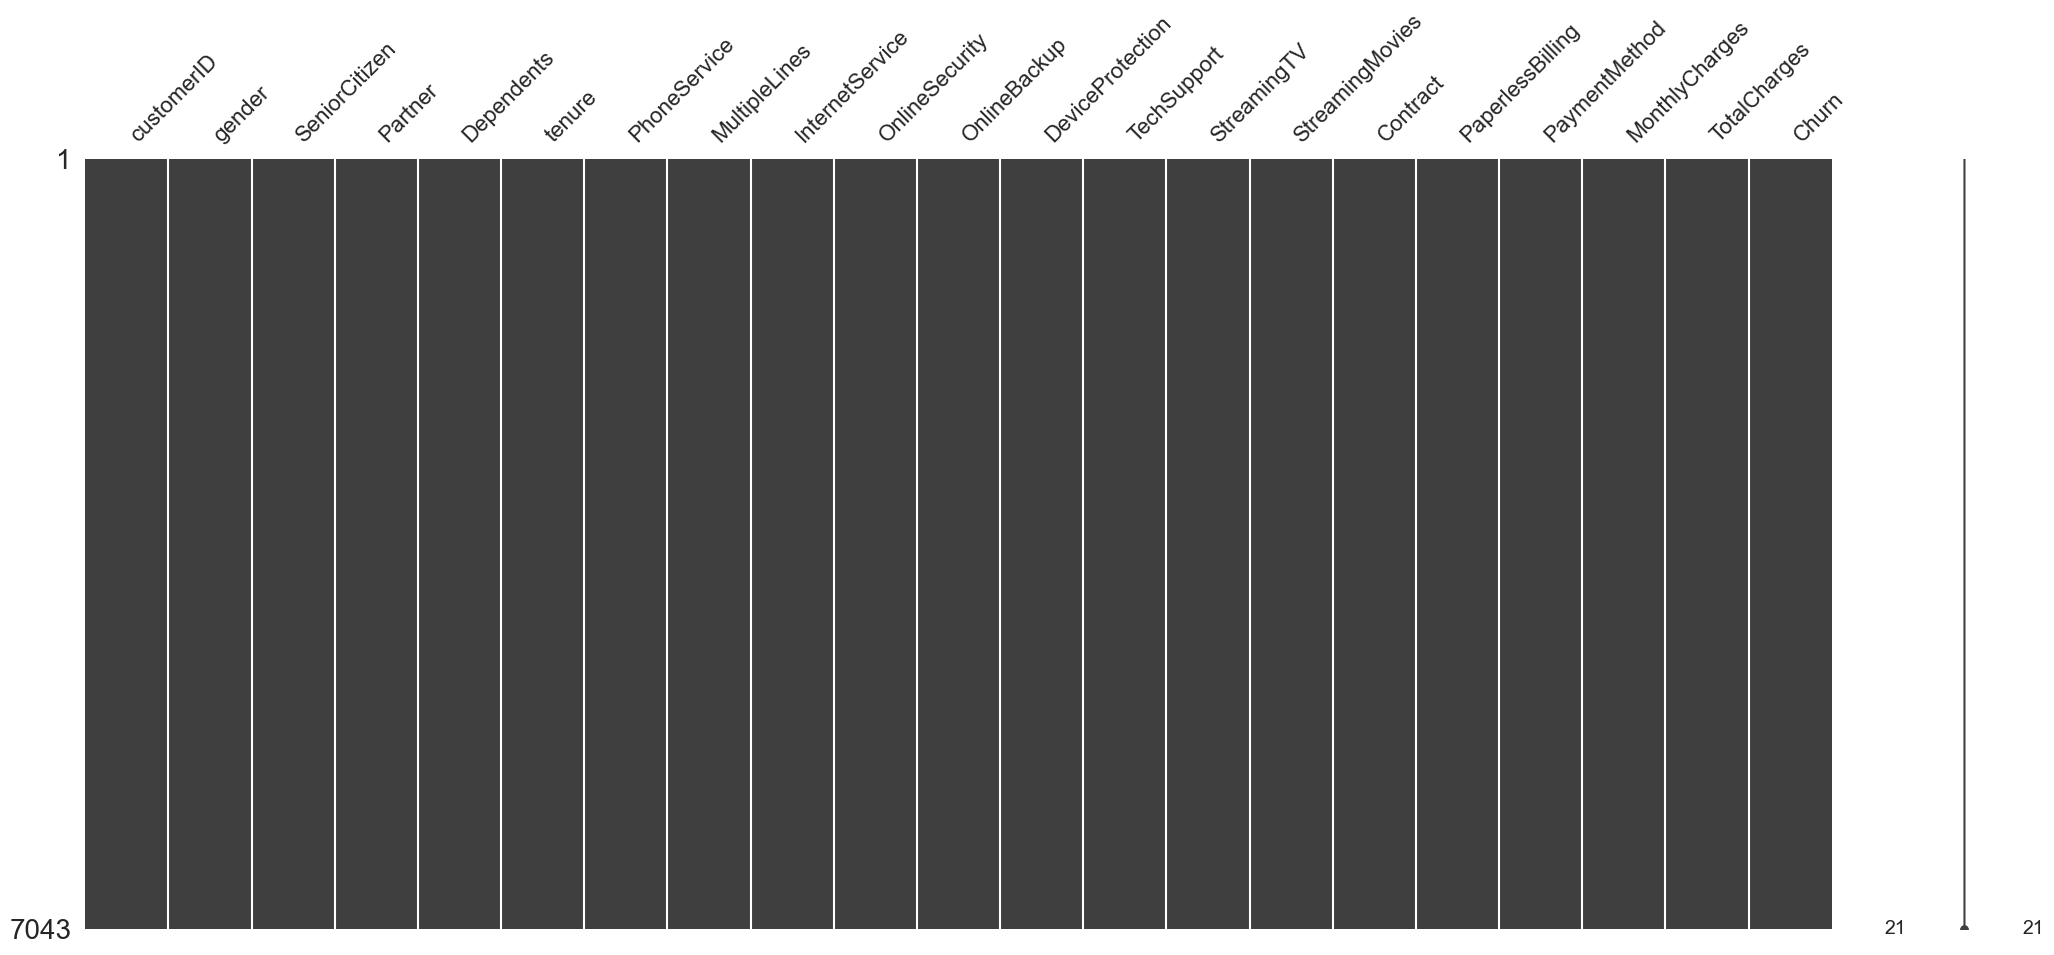

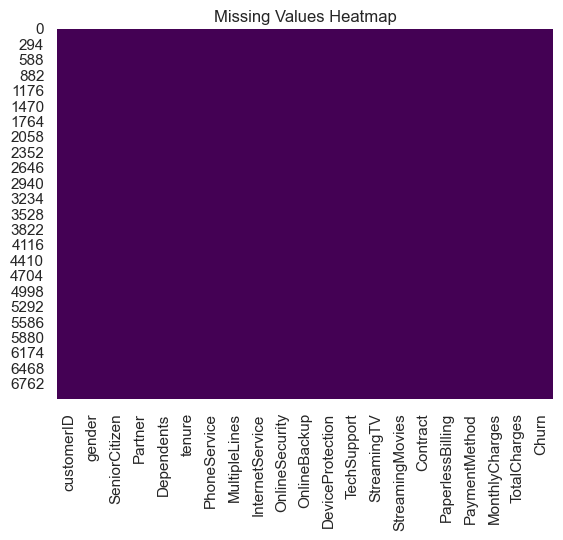

In [6]:
# Visualize missing data
msno.matrix(data)
plt.show()

# Alternatively, a heatmap of missing values
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

In [7]:
# Select only numeric columns
numeric_data = data.select_dtypes(include=['int64', 'float64'])

# Calculate correlation matrix for numeric columns
correlation_matrix = numeric_data.corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                SeniorCitizen    tenure  MonthlyCharges
SeniorCitizen        1.000000  0.016567        0.220173
tenure               0.016567  1.000000        0.247900
MonthlyCharges       0.220173  0.247900        1.000000


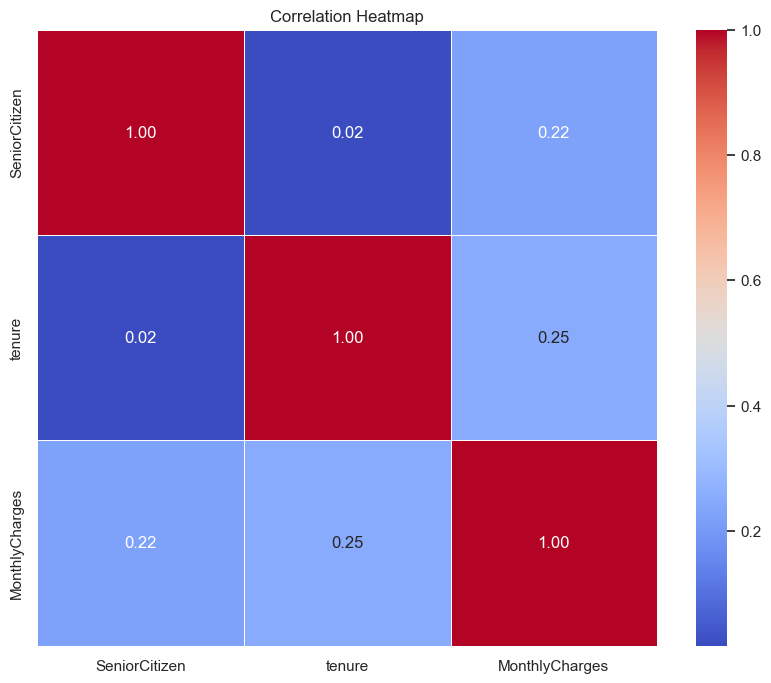

In [8]:
# Heatmap of correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

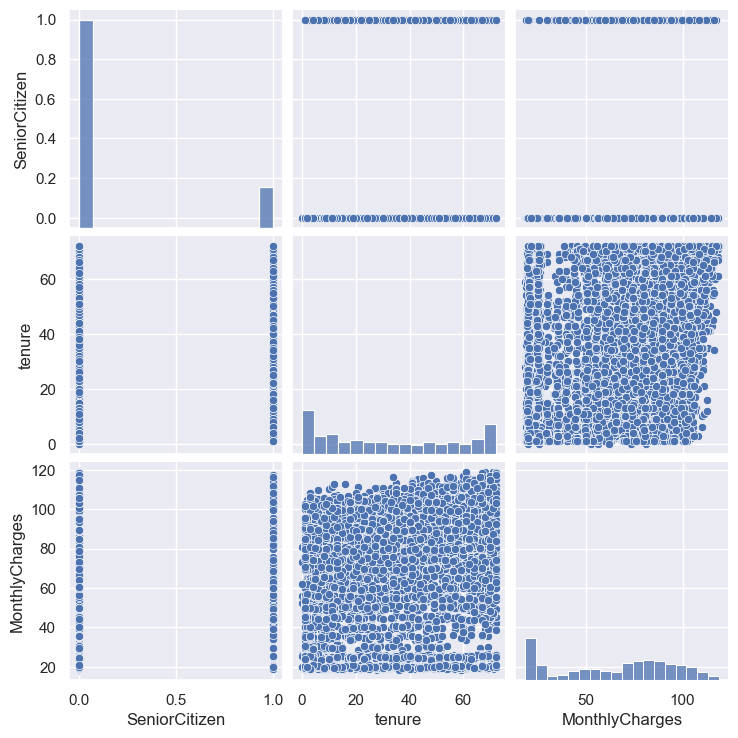

In [9]:
# Pairplot for numerical variables
sns.pairplot(data.select_dtypes(include=['float64', 'int64']))
plt.show()

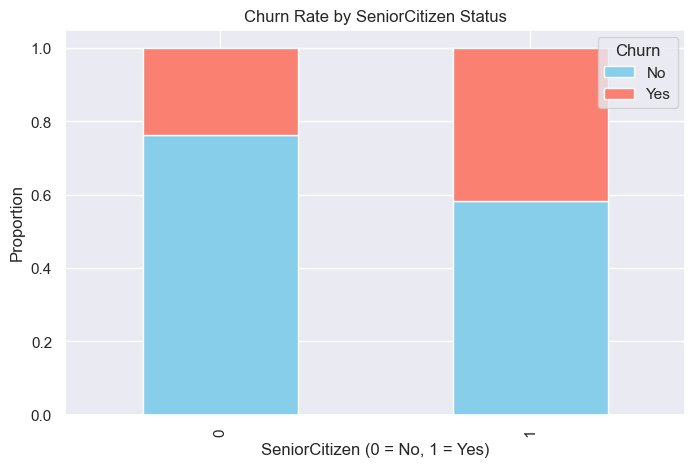

In [10]:
# Group by SeniorCitizen and calculate churn rates
senior_churn = data.groupby('SeniorCitizen')['Churn'].value_counts(normalize=True).unstack()

# Plot churn rates for SeniorCitizen
senior_churn.plot(kind='bar', stacked=True, figsize=(8, 5), color=['skyblue', 'salmon'])
plt.title("Churn Rate by SeniorCitizen Status")
plt.ylabel("Proportion")
plt.xlabel("SeniorCitizen (0 = No, 1 = Yes)")
plt.legend(title="Churn", loc='upper right')
plt.show()

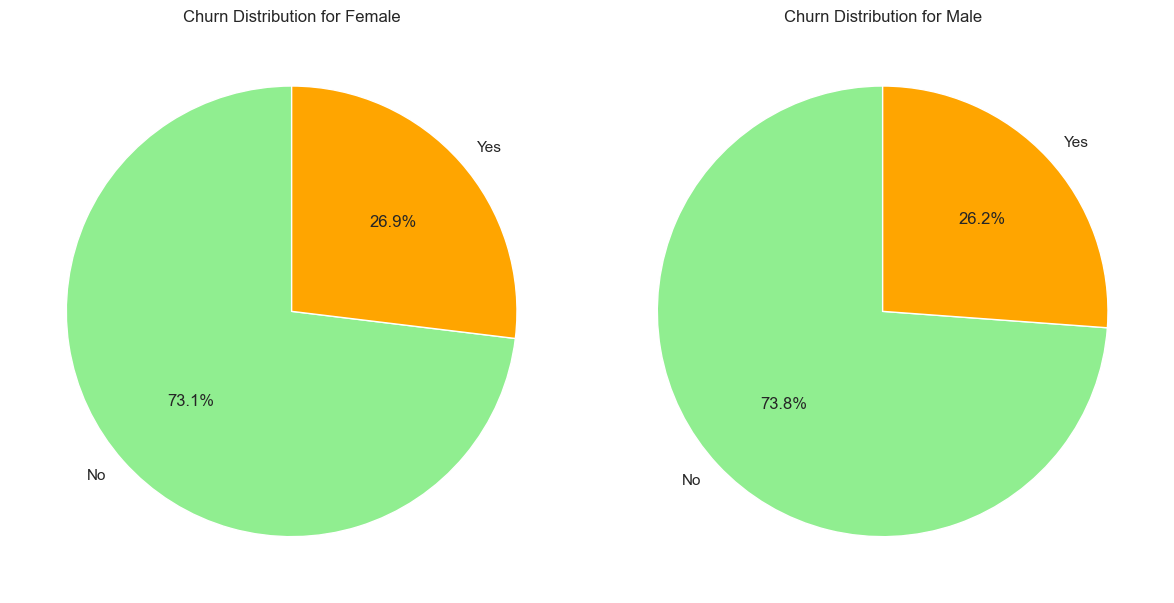

In [11]:
# Calculate churn proportions by gender
gender_churn = data.groupby('gender')['Churn'].value_counts(normalize=True).unstack()

# Plot pie charts for each gender
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

for i, gender in enumerate(gender_churn.index):
    ax[i].pie(
        gender_churn.loc[gender], 
        labels=gender_churn.columns, 
        autopct='%1.1f%%', 
        startangle=90, 
        colors=['lightgreen', 'orange']
    )
    ax[i].set_title(f"Churn Distribution for {gender}")

plt.tight_layout()
plt.show()

Summary Statistics for Tenure by Churn Status:
        count       mean        std  min   25%   50%   75%   max
Churn                                                           
No     5174.0  37.569965  24.113777  0.0  15.0  38.0  61.0  72.0
Yes    1869.0  17.979133  19.531123  1.0   2.0  10.0  29.0  72.0


C:\Users\danie\AppData\Local\Temp\ipykernel_1220\4199602499.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Churn")


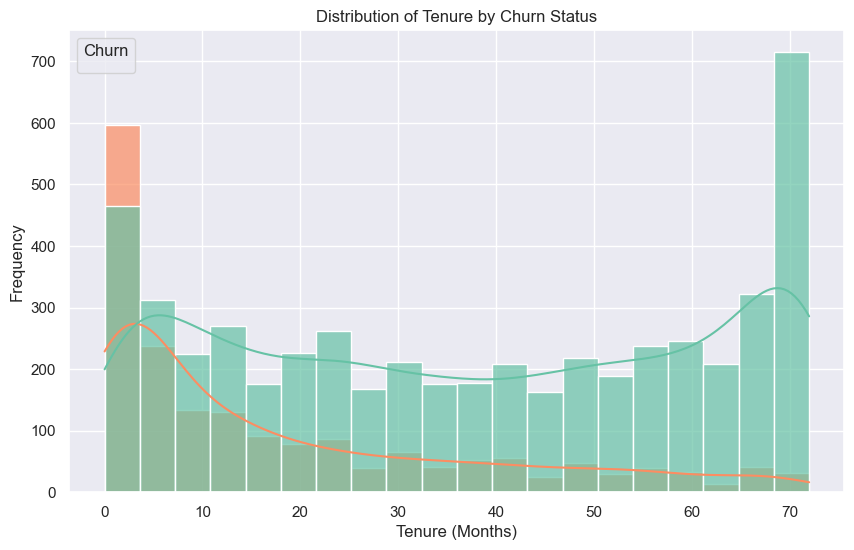

In [12]:
# Summary statistics for tenure by churn status
tenure_stats = data.groupby('Churn')['tenure'].describe()
print("Summary Statistics for Tenure by Churn Status:")
print(tenure_stats)

# Visualization: Distribution of tenure for churned vs. non-churned customers
plt.figure(figsize=(10, 6))
sns.histplot(data, x='tenure', hue='Churn', kde=True, palette='Set2', bins=20, alpha=0.7)
plt.title("Distribution of Tenure by Churn Status")
plt.xlabel("Tenure (Months)")
plt.ylabel("Frequency")
plt.legend(title="Churn")
plt.show()

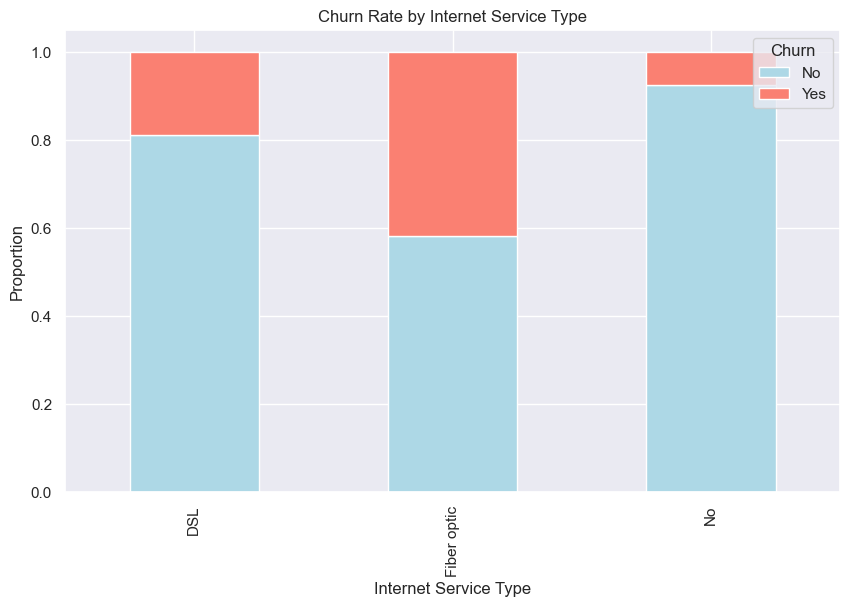

In [13]:
# Group by InternetService and calculate churn rates
internet_churn = data.groupby('InternetService')['Churn'].value_counts(normalize=True).unstack()

# Plot churn rates for InternetService
internet_churn.plot(kind='bar', stacked=True, figsize=(10, 6), color=['lightblue', 'salmon'])
plt.title("Churn Rate by Internet Service Type")
plt.ylabel("Proportion")
plt.xlabel("Internet Service Type")
plt.legend(title="Churn", loc='upper right')
plt.show()

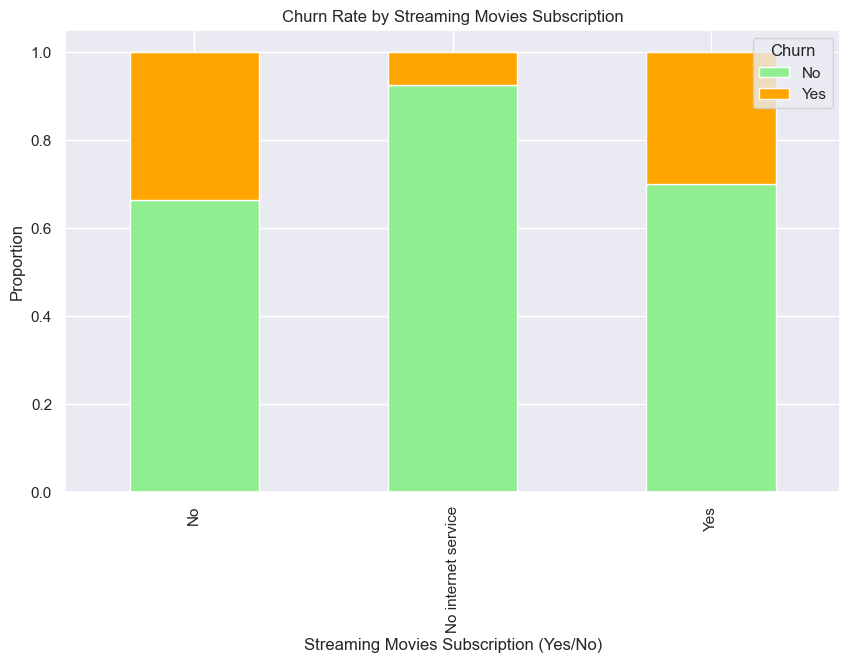

In [14]:
# Group by StreamingMovies and calculate churn rates
streaming_churn = data.groupby('StreamingMovies')['Churn'].value_counts(normalize=True).unstack()

# Plot churn rates for StreamingMovies
streaming_churn.plot(kind='bar', stacked=True, figsize=(10, 6), color=['lightgreen', 'orange'])
plt.title("Churn Rate by Streaming Movies Subscription")
plt.ylabel("Proportion")
plt.xlabel("Streaming Movies Subscription (Yes/No)")
plt.legend(title="Churn", loc='upper right')
plt.show()

C:\Users\danie\AppData\Local\Temp\ipykernel_1220\2055258684.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='MonthlyCharges', data=data, palette='Set2')


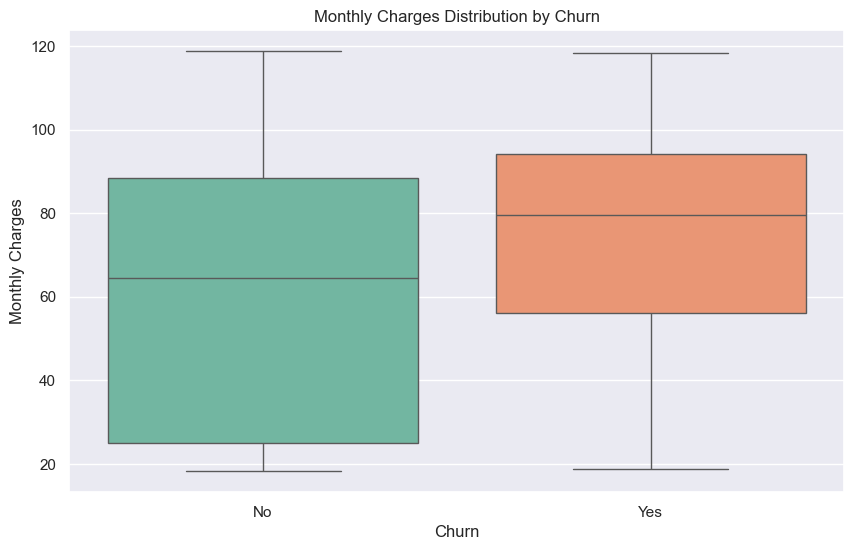

In [15]:
# Visualization: Distribution of MonthlyCharges by Churn
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='MonthlyCharges', data=data, palette='Set2')
plt.title("Monthly Charges Distribution by Churn")
plt.ylabel("Monthly Charges")
plt.xlabel("Churn")
plt.show()

C:\Users\danie\AppData\Local\Temp\ipykernel_1220\3740906227.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='TotalCharges', data=data, palette='coolwarm')


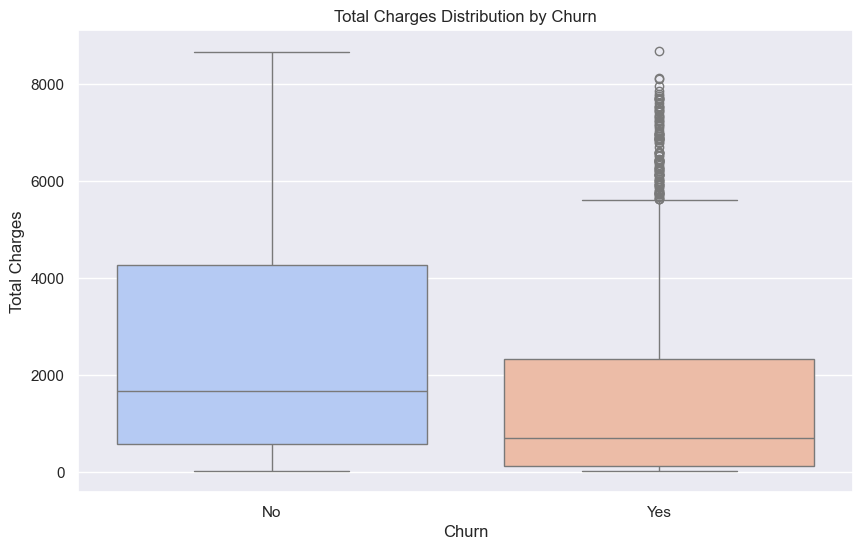

In [16]:
# Convert TotalCharges to numeric (handling potential issues with non-numeric values)
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

# Visualization: Distribution of TotalCharges by Churn
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='TotalCharges', data=data, palette='coolwarm')
plt.title("Total Charges Distribution by Churn")
plt.ylabel("Total Charges")
plt.xlabel("Churn")
plt.show()

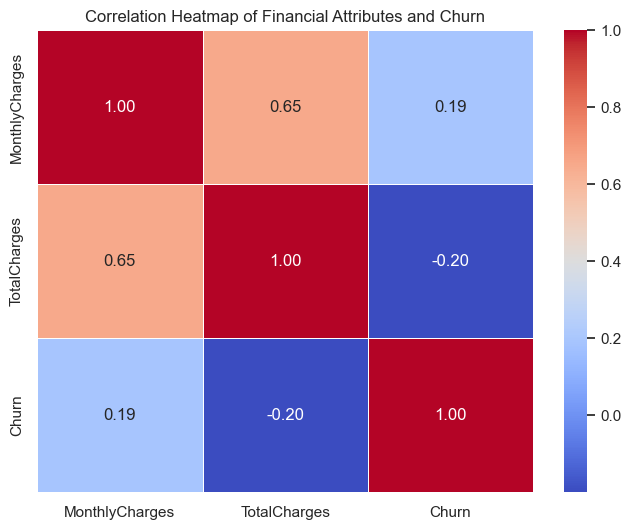

In [17]:
# Select only financial attributes and churn
numeric_data = data[['MonthlyCharges', 'TotalCharges']].copy()
numeric_data['Churn'] = data['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# Calculate correlation matrix
correlation_matrix = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap of Financial Attributes and Churn")
plt.show()

In [18]:
# Summary statistics of MonthlyCharges by Churn status
monthly_charges_stats = data.groupby('Churn')['MonthlyCharges'].describe()
print("Summary Statistics for MonthlyCharges by Churn Status:")
print(monthly_charges_stats)

Summary Statistics for MonthlyCharges by Churn Status:
        count       mean        std    min    25%     50%   75%     max
Churn                                                                  
No     5174.0  61.265124  31.092648  18.25  25.10  64.425  88.4  118.75
Yes    1869.0  74.441332  24.666053  18.85  56.15  79.650  94.2  118.35


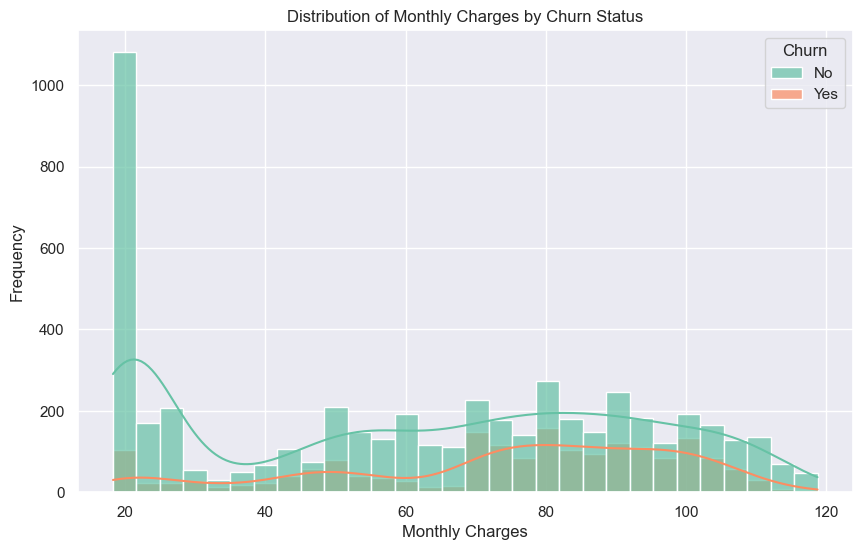

In [19]:
# Histogram for MonthlyCharges by Churn
plt.figure(figsize=(10, 6))
sns.histplot(data, x='MonthlyCharges', hue='Churn', kde=True, palette='Set2', bins=30, alpha=0.7)
plt.title("Distribution of Monthly Charges by Churn Status")
plt.xlabel("Monthly Charges")
plt.ylabel("Frequency")
plt.show()

In [20]:
# Correlation between MonthlyCharges and Churn
data['Churn_Numeric'] = data['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)
correlation = data[['MonthlyCharges', 'Churn_Numeric']].corr().iloc[0, 1]
print(f"Correlation between MonthlyCharges and Churn: {correlation:.2f}")

Correlation between MonthlyCharges and Churn: 0.19


In [21]:
# Calculate churn rates by Contract type
contract_churn = data.groupby('Contract')['Churn'].value_counts(normalize=True).unstack()

# Display churn rates
print("Churn Rates by Contract Type:")
print(contract_churn)

Churn Rates by Contract Type:
Churn                 No       Yes
Contract                          
Month-to-month  0.572903  0.427097
One year        0.887305  0.112695
Two year        0.971681  0.028319


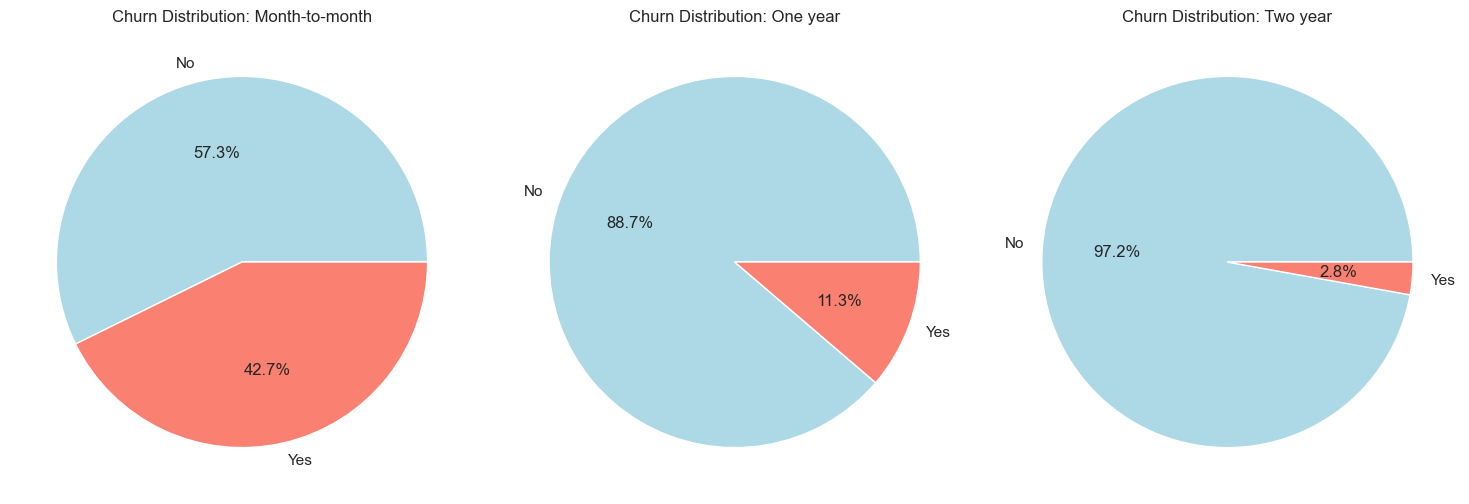

In [22]:
# Calculate churn proportions by Contract type
contract_churn_counts = data.groupby('Contract')['Churn'].value_counts(normalize=True).unstack()

# Pie chart for churn proportions
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
contract_types = contract_churn_counts.index

for i, contract in enumerate(contract_types):
    ax[i].pie(contract_churn_counts.loc[contract], labels=contract_churn_counts.columns, autopct='%1.1f%%', colors=['lightblue', 'salmon'])
    ax[i].set_title(f"Churn Distribution: {contract}")

plt.tight_layout()
plt.show()

In [23]:
# Filter data for churned customers
churned_customers = data[data['Churn'] == 'Yes']

# Count PaymentMethod occurrences
payment_method_counts = churned_customers['PaymentMethod'].value_counts()

# Display the counts
print("Payment Methods Among Churned Customers:")
print(payment_method_counts)

Payment Methods Among Churned Customers:
PaymentMethod
Electronic check             1071
Mailed check                  308
Bank transfer (automatic)     258
Credit card (automatic)       232
Name: count, dtype: int64


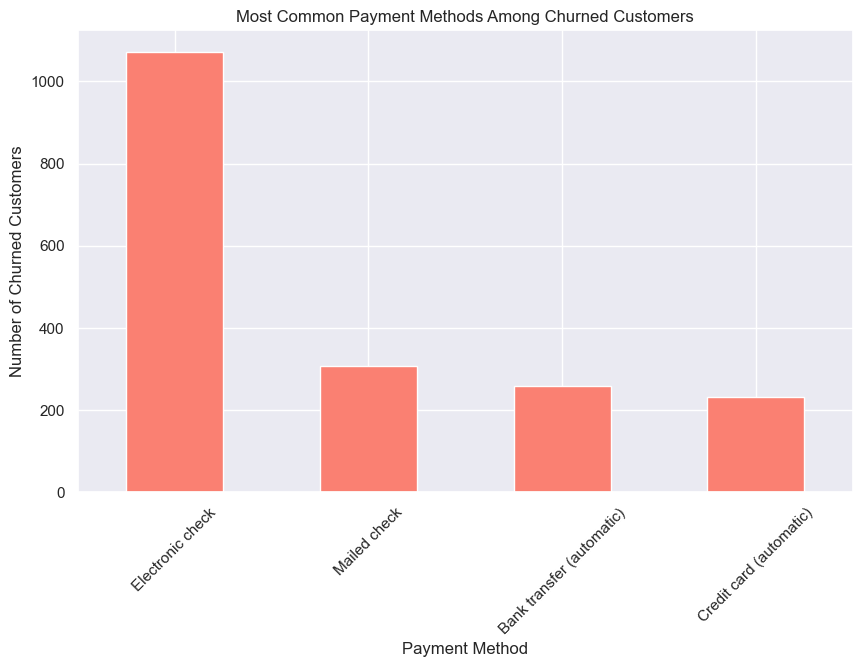

In [24]:
# Bar chart for PaymentMethod of churned customers
plt.figure(figsize=(10, 6))
payment_method_counts.plot(kind='bar', color='salmon')
plt.title("Most Common Payment Methods Among Churned Customers")
plt.ylabel("Number of Churned Customers")
plt.xlabel("Payment Method")
plt.xticks(rotation=45)
plt.show()

In [25]:
# List of service-related columns
service_columns = ['OnlineBackup', 'TechSupport', 'DeviceProtection', 'StreamingTV', 'StreamingMovies']

# Create a new column to count the number of "Yes" services per customer
data['TotalServices'] = data[service_columns].apply(lambda x: (x == 'Yes').sum(), axis=1)

# Display the first few rows to verify
print(data[['TotalServices', 'Churn']].head())

   TotalServices Churn
0              1    No
1              1    No
2              1   Yes
3              2    No
4              0   Yes


In [26]:
# Calculate churn rates by TotalServices
churn_by_services = data.groupby('TotalServices')['Churn'].value_counts(normalize=True).unstack()

# Display the churn rates
print("Churn Rates by Total Services:")
print(churn_by_services)

Churn Rates by Total Services:
Churn                No       Yes
TotalServices                    
0              0.779866  0.220134
1              0.593002  0.406998
2              0.673384  0.326616
3              0.725581  0.274419
4              0.792654  0.207346
5              0.909492  0.090508


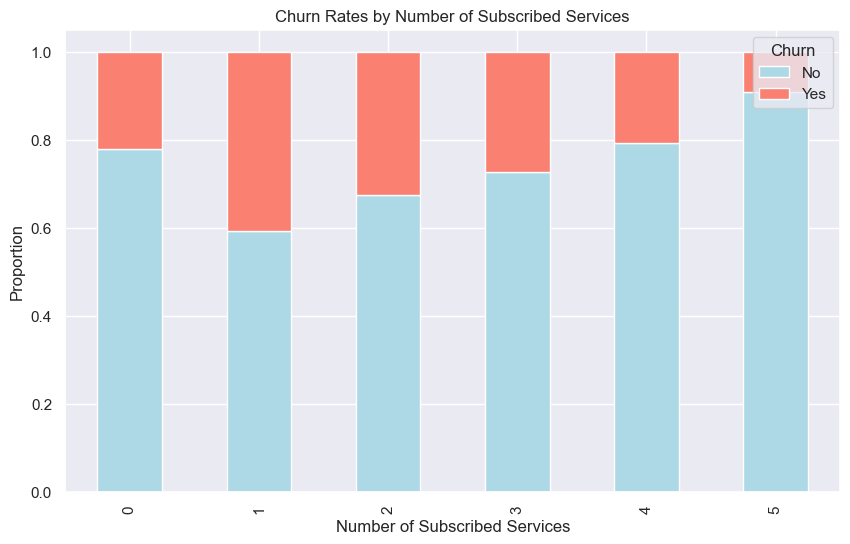

In [27]:
# Bar chart of churn rates by number of services
churn_by_services.plot(kind='bar', stacked=True, figsize=(10, 6), color=['lightblue', 'salmon'])
plt.title("Churn Rates by Number of Subscribed Services")
plt.ylabel("Proportion")
plt.xlabel("Number of Subscribed Services")
plt.legend(title="Churn", loc='upper right')
plt.show()

In [28]:
# Select features for clustering
features = data[['tenure', 'MonthlyCharges', 'TotalCharges']].copy()
features['TotalCharges'] = pd.to_numeric(features['TotalCharges'], errors='coerce')  # Convert TotalCharges to numeric

# Drop rows with missing values in TotalCharges
features.dropna(inplace=True)

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Display the scaled features
print("Scaled Features:")
print(scaled_features[:5])

Scaled Features:
[[-1.28024804 -1.16169394 -0.99419409]
 [ 0.06430269 -0.26087792 -0.17373982]
 [-1.23950408 -0.36392329 -0.95964911]
 [ 0.51248626 -0.74785042 -0.19524771]
 [-1.23950408  0.19617818 -0.94045745]]


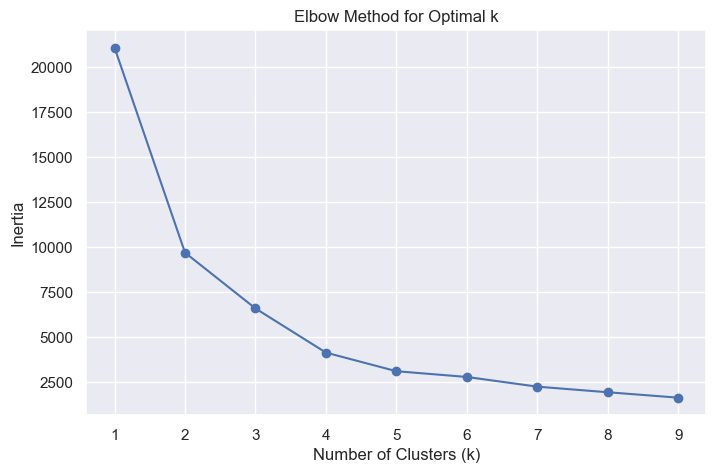

In [29]:
# Determine the optimal number of clusters using the Elbow Method
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 10), inertia, marker='o')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.show()